# Data Preprocessing

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('./data/diabetes_data_preprocessed.csv')

# sanity check
print(df.shape)

(251, 16)


### Outlier Detection


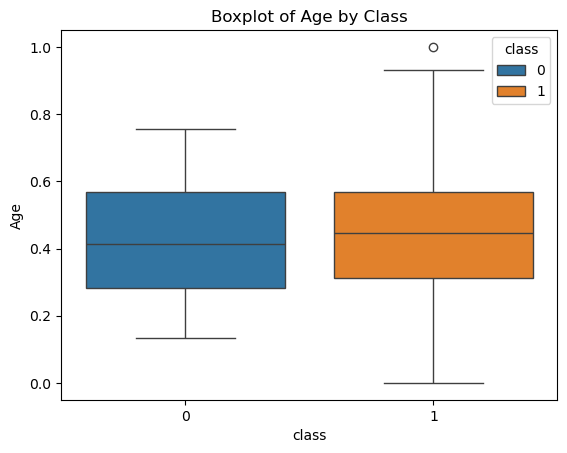

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x="class", y="Age", data=df, hue='class')
plt.title(f'Boxplot of Age by Class')
plt.show()

In [3]:
# calculate IQR
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
    
# define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
    
# find outliers
outliers = df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]

# sanity check and drop outliers
print(df.shape)
df.drop(labels=[101], axis=0, inplace=True)
print(df.shape)

(251, 16)
(250, 16)


### One Hot Encoding

In [4]:
# initialize empty list
nominal_features = []

# append all the nominal features into the empty list
for col in df.columns:
    if df[col].dtype == object:
        nominal_features.append(col)

# sanity check
print(nominal_features)

['Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching', 'Irritability', 'delayed healing', 'partial paresis', 'muscle stiffness', 'Alopecia', 'Obesity']


In [5]:
from sklearn.preprocessing import OneHotEncoder

# initialize encoder and perform one-hot encoding
encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(df[nominal_features])
encoded_columns = encoder.get_feature_names_out(nominal_features)
encoded_df = pd.DataFrame(encoded_data, columns=encoded_columns)

# reset indices
df.reset_index(drop=True, inplace=True)
encoded_df.reset_index(drop=True, inplace=True)

# concatenate encoded nominal features with original df
new_df = pd.concat([df['Age'], encoded_df, df['class']], axis=1)

# sanity check
print(new_df.shape)
print(new_df.columns)

(250, 30)
Index(['Age', 'Polyuria_No', 'Polyuria_Yes', 'Polydipsia_No', 'Polydipsia_Yes',
       'sudden weight loss_No', 'sudden weight loss_Yes', 'weakness_No',
       'weakness_Yes', 'Polyphagia_No', 'Polyphagia_Yes', 'Genital thrush_No',
       'Genital thrush_Yes', 'visual blurring_No', 'visual blurring_Yes',
       'Itching_No', 'Itching_Yes', 'Irritability_No', 'Irritability_Yes',
       'delayed healing_No', 'delayed healing_Yes', 'partial paresis_No',
       'partial paresis_Yes', 'muscle stiffness_No', 'muscle stiffness_Yes',
       'Alopecia_No', 'Alopecia_Yes', 'Obesity_No', 'Obesity_Yes', 'class'],
      dtype='object')


### Feature Ranking

In [6]:
correlation_matrix = new_df.corr()

print(correlation_matrix['class'].sort_values(axis=0,ascending=False))

class                     1.000000
Polyuria_Yes              0.625773
Polydipsia_Yes            0.593649
sudden weight loss_Yes    0.370744
partial paresis_Yes       0.363613
Polyphagia_Yes            0.320166
Irritability_Yes          0.270951
Alopecia_No               0.202525
visual blurring_Yes       0.196886
Genital thrush_Yes        0.187870
weakness_Yes              0.154458
muscle stiffness_Yes      0.110981
Obesity_Yes               0.084517
delayed healing_Yes       0.051801
Age                       0.044817
Itching_No                0.029148
Itching_Yes              -0.029148
delayed healing_No       -0.051801
Obesity_No               -0.084517
muscle stiffness_No      -0.110981
weakness_No              -0.154458
Genital thrush_No        -0.187870
visual blurring_No       -0.196886
Alopecia_Yes             -0.202525
Irritability_No          -0.270951
Polyphagia_No            -0.320166
partial paresis_No       -0.363613
sudden weight loss_No    -0.370744
Polydipsia_No       

In [7]:
# define independent and dependent variables
X = new_df.drop(labels=['class'], axis=1)
y = new_df['class']

print(X.shape)
print(y.shape)

(250, 29)
(250,)


In [8]:
from sklearn.ensemble import RandomForestClassifier

# initialize random forest classifier for feature ranking
tree = RandomForestClassifier()

tree.fit(X, y)
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': tree.feature_importances_
})

# sort by importance
importance_df = importance_df.sort_values(by='importance', ascending=False)

print(importance_df)

                   feature  importance
1              Polyuria_No    0.145232
3            Polydipsia_No    0.106237
0                      Age    0.095170
2             Polyuria_Yes    0.094447
4           Polydipsia_Yes    0.088245
6   sudden weight loss_Yes    0.034650
5    sudden weight loss_No    0.028793
22     partial paresis_Yes    0.027349
21      partial paresis_No    0.026802
14     visual blurring_Yes    0.024809
16             Itching_Yes    0.024162
13      visual blurring_No    0.023634
17         Irritability_No    0.021580
8             weakness_Yes    0.019665
26            Alopecia_Yes    0.019144
18        Irritability_Yes    0.018190
9            Polyphagia_No    0.017792
15              Itching_No    0.017789
10          Polyphagia_Yes    0.017608
27              Obesity_No    0.017480
20     delayed healing_Yes    0.016470
19      delayed healing_No    0.015927
28             Obesity_Yes    0.015602
24    muscle stiffness_Yes    0.014692
12      Genital thrush_Ye

In [9]:
new_df = new_df.drop(labels=['Alopecia_Yes', 'Alopecia_No', 'Itching_Yes', 'Itching_No', 'weakness_Yes','weakness_No','Genital thrush_Yes', 'Genital thrush_No','delayed healing_No', 'delayed healing_Yes','muscle stiffness_Yes','muscle stiffness_No'], axis=1)

# sanity check
print(new_df.shape)

(250, 18)


* Using a correlation matrix and the random forest algorithm for feature ranking, the following features were dropped due to either low relevance or redundancy:
    - alopecia
    - itching
    - weakness
    - genital thrush
    - delayed healing
    - muscle stiffness

In [10]:
print(new_df.columns)

Index(['Age', 'Polyuria_No', 'Polyuria_Yes', 'Polydipsia_No', 'Polydipsia_Yes',
       'sudden weight loss_No', 'sudden weight loss_Yes', 'Polyphagia_No',
       'Polyphagia_Yes', 'visual blurring_No', 'visual blurring_Yes',
       'Irritability_No', 'Irritability_Yes', 'partial paresis_No',
       'partial paresis_Yes', 'Obesity_No', 'Obesity_Yes', 'class'],
      dtype='object')


# Model Selection and Training

In [11]:
# redefine independent and dependent variables
X = new_df.drop(labels=['class'], axis=1)
y = new_df['class']

print(X.shape)
print(y.shape)

(250, 17)
(250,)


In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split

In [13]:
# partition data into testing and training datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, shuffle=True)

In [14]:
# initialize decision tree
dt = DecisionTreeClassifier()

# define parameters to try for grid search
dt_grid = {
    'criterion': ['gini', 'entropy'],  # splitting criterion
    'max_depth': range(1, 10),  
    'max_features': [None, 'sqrt', 'log2'],  # Number of features to consider when looking for the best split
    'ccp_alpha': [0.01, 0.02, 0.03, 0.04, 0.05],
    'splitter': ['best', 'random']  # How to split at each node
}

# grid search and 10-fold cross-validation
clf = GridSearchCV(dt, dt_grid, cv=3, n_jobs = -1)
clf.fit(X_train, y_train)

# print best parameters to use
print(clf.best_params_)

{'ccp_alpha': 0.01, 'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'splitter': 'random'}


In [15]:
dt = DecisionTreeClassifier(ccp_alpha=0.04, criterion='entropy', max_depth=3, max_features='log2', splitter='random')
dt_scores = cross_val_score(clf, X, y, cv=10)

# print the accuracy for each fold
print("Accuracy scores for each fold:")
print(dt_scores)

# print the mean and standard deviation of the scores to get a summary of the performance
print(f"Mean accuracy: {dt_scores.mean():.4f}")
print(f"Standard deviation: {dt_scores.std():.4f}")

Accuracy scores for each fold:
[0.72 0.84 0.92 0.76 0.76 0.76 0.88 0.84 0.96 0.84]
Mean accuracy: 0.8280
Standard deviation: 0.0739


In [16]:
# initialize decision tree
svm = SVC()

# define parameters to try
svm_grid = {
    'C': [0.1, 1, 10, 100],  
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  
    'degree': [2, 3, 4],  
    'gamma': ['scale', 'auto'],  
    'class_weight': [None, 'balanced'],
}

# grid search and 10-fold cross-validation
clf = GridSearchCV(svm, svm_grid, cv=3, n_jobs = -1)
clf.fit(X_train, y_train)

# print best parameters to use
print(clf.best_params_)

{'C': 1, 'class_weight': 'balanced', 'degree': 4, 'gamma': 'scale', 'kernel': 'poly'}


In [17]:
svm = SVC(C=10, class_weight='balanced', degree=2, gamma='auto', kernel='sigmoid')

svm_scores = cross_val_score(clf, X, y, cv=10)

# print the accuracy for each fold
print("Accuracy scores for each fold:")
print(svm_scores)

# print the mean and standard deviation of the scores to get a summary of the performance
print(f"Mean accuracy: {svm_scores.mean():.4f}")
print(f"Standard deviation: {svm_scores.std():.4f}")

Accuracy scores for each fold:
[0.88 0.84 0.96 0.76 0.8  0.88 0.96 0.8  0.96 0.96]
Mean accuracy: 0.8800
Standard deviation: 0.0738


In [18]:
rf = RandomForestClassifier(ccp_alpha=0.04, criterion='entropy', max_depth=3, max_features='log2')
rf_scores = cross_val_score(rf,X,y,cv=10)

# print the accuracy for each fold
print("Accuracy scores for each fold:")
print(rf_scores)

# print the mean and standard deviation of the scores to get a summary of the performance
print(f"Mean accuracy: {rf_scores.mean():.4f}")
print(f"Standard deviation: {rf_scores.std():.4f}")

Accuracy scores for each fold:
[0.84 0.84 0.92 0.76 0.76 0.88 0.96 0.88 0.96 0.92]
Mean accuracy: 0.8720
Standard deviation: 0.0688


In [19]:
# initialize decision tree
lr = LogisticRegression()

param_grid_lr = {
    'penalty': ['l1', 'l2', 'elasticnet', None],  
    'C': [0.01, 0.1, 1, 10, 100],  
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],  
    'max_iter': [100, 200, 500],  
    'class_weight': [None, 'balanced'],  
    'l1_ratio': [None, 0.5, 0.7]
}

# grid search and 10-fold cross-validation
clf = GridSearchCV(lr, param_grid_lr, cv=3, n_jobs = -1)
clf.fit(X_train, y_train)

# print best parameters to use
print(clf.best_params_)

{'C': 10, 'class_weight': None, 'l1_ratio': None, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}


c:\Users\Ethan Mach\anaconda3\envs\diabetes_prediction\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
2250 fits failed out of a total of 5400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
270 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Ethan Mach\anaconda3\envs\diabetes_prediction\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Ethan Mach\anaconda3\envs\diabetes_prediction\lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\Ethan Mach\anaconda3\envs\diabetes_prediction\lib\site-pa

In [20]:
lr = LogisticRegression(C=0.1, class_weight=None, l1_ratio = None, max_iter=100, penalty='l2', solver='liblinear')
lr_scores = cross_val_score(lr,X,y,cv=10)

# print the accuracy for each fold
print("Accuracy scores for each fold:")
print(lr_scores)

# print the mean and standard deviation of the scores to get a summary of the performance
print(f"Mean accuracy: {lr_scores.mean():.4f}")
print(f"Standard deviation: {lr_scores.std():.4f}")

Accuracy scores for each fold:
[0.84 0.84 0.96 0.76 0.76 0.88 0.96 0.84 0.92 0.96]
Mean accuracy: 0.8720
Standard deviation: 0.0733


In [21]:
# initialize decision tree
mlp = MLPClassifier()

param_grid_mlp = {
    'hidden_layer_sizes': [(100,), (50, 50), (100, 50, 10)],  
    'activation': ['tanh', 'relu', 'logistic'],  
    'solver': ['adam', 'sgd', 'lbfgs'],  
    'alpha': [0.0001, 0.001, 0.01],  
    'learning_rate': ['constant', 'adaptive'],  
    'max_iter': [200, 500, 1000]
}

# grid search and 10-fold cross-validation
clf = GridSearchCV(mlp, param_grid_mlp, cv=3, n_jobs = -1)
clf.fit(X_train, y_train)

# print best parameters to use
print(clf.best_params_)

{'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'constant', 'max_iter': 200, 'solver': 'adam'}


c:\Users\Ethan Mach\anaconda3\envs\diabetes_prediction\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [22]:
mlp = MLPClassifier(activation='relu', alpha=0.001, hidden_layer_sizes=(100,), learning_rate='adaptive', max_iter=200, solver='sgd')
mlp_scores = cross_val_score(mlp,X,y,cv=10)

# print the accuracy for each fold
print("Accuracy scores for each fold:")
print(mlp_scores)

# print the mean and standard deviation of the scores to get a summary of the performance
print(f"Mean accuracy: {mlp_scores.mean():.4f}")
print(f"Standard deviation: {mlp_scores.std():.4f}")

c:\Users\Ethan Mach\anaconda3\envs\diabetes_prediction\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Ethan Mach\anaconda3\envs\diabetes_prediction\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Ethan Mach\anaconda3\envs\diabetes_prediction\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Ethan Mach\anaconda3\envs\diabetes_prediction\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the opti

Accuracy scores for each fold:
[0.88 0.88 0.96 0.76 0.76 0.88 1.   0.8  0.92 0.92]
Mean accuracy: 0.8760
Standard deviation: 0.0768


c:\Users\Ethan Mach\anaconda3\envs\diabetes_prediction\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


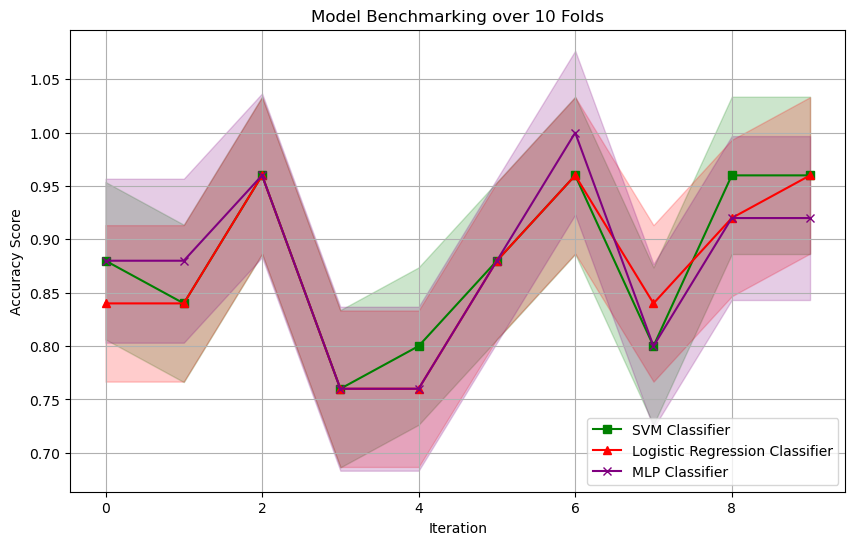

In [23]:
plt.figure(figsize=(10,6))

# plot the classifiers
plt.plot(range(10), svm_scores, label="SVM Classifier", color='green', marker='s')
plt.plot(range(10), lr_scores, label="Logistic Regression Classifier", color='red', marker='^')
plt.plot(range(10), mlp_scores, label="MLP Classifier", color='purple', marker='x')

# shade the classifiers with their standard deviations
plt.fill_between(range(10), svm_scores - svm_scores.std(), svm_scores + svm_scores.std(), color='green', alpha=0.2)
plt.fill_between(range(10), lr_scores - lr_scores.std(), lr_scores + lr_scores.std(), color='red', alpha=0.2)
plt.fill_between(range(10), mlp_scores - mlp_scores.std(), mlp_scores + mlp_scores.std(), color='purple', alpha=0.2)

# labels and legends
plt.title('Model Benchmarking over 10 Folds')
plt.xlabel('Iteration')
plt.ylabel('Accuracy Score')
plt.legend(loc='lower right')
plt.grid(True)




# Concluding Remarks

* The top three classifiers were graphed above and compared. Their metrics are shown as below:
    - SVM
        - Mean accuracy: 0.8800
        - Standard deviation: 0.0738
    - Logistic Regression
        - Mean accuracy: 0.8720
        - Standard deviation: 0.0733
    - Neural Network
        - Mean accuracy: 0.8720
        - Standard deviation: 0.0816

* Overall, SVM appears to be the most robust model, as it has the highest accuracy while maintaining one of the lowest standard deviations. Although the standard deviation of SVM is slightly higher compared to logistic regression, the gain in accuracy makes SVM the more favorable choice.